In [1]:
import pandas as pd
import numpy as np

In [2]:
# with open('Reference_class_dataset.tsv','w') as fp:
#     fp.write('')

In [529]:
df=pd.read_csv('Reference_class_dataset.csv')
print(df['Types'].unique())
df.describe()

['TRADITIONAL REF' 'NON TRADITIONAL REF']


,FileName,Reference,Types
count,2835,2835,2835
unique,667,2835,2
top,NU8SU001C,"Unikel, L. (1976). El desarrollo urbano de Mex...",TRADITIONAL REF
freq,88,1,1445


In [530]:
df['Types'].value_counts()

TRADITIONAL REF        1445
NON TRADITIONAL REF    1390
Name: Types, dtype: int64

In [531]:
df

,FileName,Reference,Types
0,NE9KL000C,"Burmeister, L.C., Convective Heat Transfer, Ne...",TRADITIONAL REF
1,NE9KL000C,"Heislbetz, B., Madlener, K., and Ciezki, H., B...",TRADITIONAL REF
2,NE9KL000C,"Hinze, J.O., Turbulence, New York, NY: McGraw-...",TRADITIONAL REF
3,NE9KL000C,"Jyoti, B.V.S. and Baek, S.W., Rheological Char...",TRADITIONAL REF
4,NE9KL000C,"Modekurti, A., Numerical Investigation of Flui...",TRADITIONAL REF
...,...,...,...
2830,BQ1IM011C,Securing Smart Cities. [Online]. Available: [ ...,NON TRADITIONAL REF
2831,BQ1IM011C,Global Systems Science. [ Online]. Available: ...,NON TRADITIONAL REF
2832,BQ1IM011C,Road2SoS. [ Online]. Available: http://www.roa...,NON TRADITIONAL REF
2833,BQ1IM011C,COMPASS. [ Online]. Available: http://www.comp...,NON TRADITIONAL REF


In [532]:
df.columns

Index(['FileName', 'Reference', 'Types'], dtype='object')

In [533]:
c=0
for i in df['Reference'][df['Reference'].duplicated()]:
    print(i)
    c+=1
print(c)

0


In [534]:
for i in df['Reference']:
    if(i[0]==' '):
        print(i)

In [535]:
df

,FileName,Reference,Types
0,NE9KL000C,"Burmeister, L.C., Convective Heat Transfer, Ne...",TRADITIONAL REF
1,NE9KL000C,"Heislbetz, B., Madlener, K., and Ciezki, H., B...",TRADITIONAL REF
2,NE9KL000C,"Hinze, J.O., Turbulence, New York, NY: McGraw-...",TRADITIONAL REF
3,NE9KL000C,"Jyoti, B.V.S. and Baek, S.W., Rheological Char...",TRADITIONAL REF
4,NE9KL000C,"Modekurti, A., Numerical Investigation of Flui...",TRADITIONAL REF
...,...,...,...
2830,BQ1IM011C,Securing Smart Cities. [Online]. Available: [ ...,NON TRADITIONAL REF
2831,BQ1IM011C,Global Systems Science. [ Online]. Available: ...,NON TRADITIONAL REF
2832,BQ1IM011C,Road2SoS. [ Online]. Available: http://www.roa...,NON TRADITIONAL REF
2833,BQ1IM011C,COMPASS. [ Online]. Available: http://www.comp...,NON TRADITIONAL REF


In [536]:
c=0
for i in range(len(df['Reference'])):
    if(df['Reference'][i][0]==' '):
        print(i)
        c+=1
print(c)

0


# _________________CLASSIFICATION SPACY _________________

In [537]:
import nltk
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to C:\Users\Aaditya
[nltk_data]     Raj\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [538]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import string
import re
from collections import Counter
from nltk.corpus import stopwords
stopwords = stopwords.words('english')

In [539]:
df = pd.read_csv('Reference_class_dataset.csv')
df.head()

,FileName,Reference,Types
0,NE9KL000C,"Burmeister, L.C., Convective Heat Transfer, Ne...",TRADITIONAL REF
1,NE9KL000C,"Heislbetz, B., Madlener, K., and Ciezki, H., B...",TRADITIONAL REF
2,NE9KL000C,"Hinze, J.O., Turbulence, New York, NY: McGraw-...",TRADITIONAL REF
3,NE9KL000C,"Jyoti, B.V.S. and Baek, S.W., Rheological Char...",TRADITIONAL REF
4,NE9KL000C,"Modekurti, A., Numerical Investigation of Flui...",TRADITIONAL REF


In [540]:
data=df[['Reference','Types']]

In [541]:
data
data.isnull().sum()

Reference    0
Types        0
dtype: int64

In [542]:
print(round(random.random(), 2))
round(random.uniform(0.10, 0.40), 2)

0.42


0.11

In [543]:
from sklearn.model_selection import train_test_split
import random
# rs=random.randrange(100, 10, -2)
# size=random.uniform(0.10, 0.40)
print('random_state:',rs,'Size:',size)
train, test = train_test_split(data, test_size=0.13, random_state=92)
print('Reference sample:', train['Reference'].iloc[0])
print('Type of this Reference:', train['Types'].iloc[0])
print('Training Data Shape:', train.shape)
print('Testing Data Shape:', test.shape)

random_state: 32 Size: 0.2827185761529229
Reference sample: Mintz, A. and Wayne, C. (2016) The Ploythink Syndrome: US Foriegn Policy Decisions on 9/ s11, Afghanistan, Iraq, Syria, and ISIS, Stanford, CA: Stanford University Press.
Type of this Reference: NON TRADITIONAL REF
Training Data Shape: (2466, 2)
Testing Data Shape: (369, 2)


In [544]:
# test['Reference']

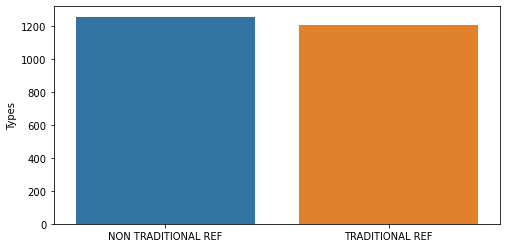

In [546]:
fig = plt.figure(figsize=(8,4))
sns.barplot(x = train['Types'].unique(), y=train['Types'].value_counts())
plt.show()

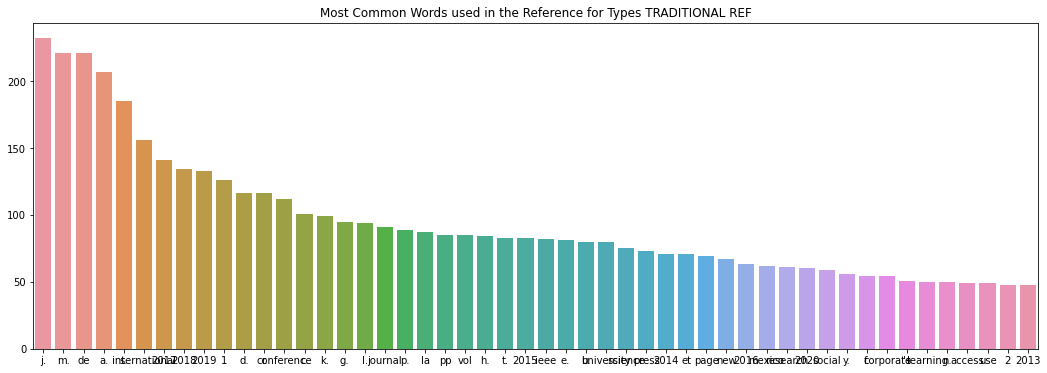

In [547]:
import spacy
nlp = spacy.load('en_core_web_sm')
punctuations = string.punctuation
def cleanup_text(docs, logging=False):
    texts = []
    counter = 1
    for doc in docs:
        if counter % 1000 == 0 and logging:
            print("Processed %d out of %d documents." % (counter, len(docs)))
        counter += 1
        doc = nlp(doc, disable=['parser', 'ner'])
        tokens = [tok.lemma_.lower().strip() for tok in doc if tok.lemma_ != '-PRON-']
        tokens = [tok for tok in tokens if tok not in stopwords and tok not in punctuations]
        tokens = ' '.join(tokens)
        texts.append(tokens)
    return pd.Series(texts)
INFO_text = [text for text in train[train['Types'] == 'TRADITIONAL REF']['Reference']]
IS_text = [text for text in train[train['Types'] == 'NON TRADITIONAL REF']['Reference']]
INFO_clean = cleanup_text(INFO_text)
INFO_clean = ' '.join(INFO_clean).split()
IS_clean = cleanup_text(IS_text)
IS_clean = ' '.join(IS_clean).split()
INFO_counts = Counter(INFO_clean)
IS_counts = Counter(IS_clean)
INFO_common_words = [word[0] for word in INFO_counts.most_common(50)]
INFO_common_counts = [word[1] for word in INFO_counts.most_common(50)]
fig = plt.figure(figsize=(18,6))
sns.barplot(x=INFO_common_words, y=INFO_common_counts)
plt.title('Most Common Words used in the Reference for Types TRADITIONAL REF')
plt.show()

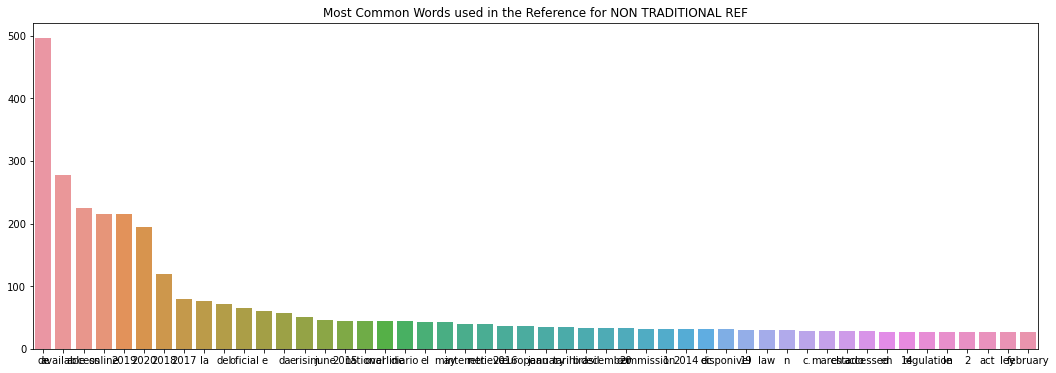

In [548]:
IS_common_words = [word[0] for word in IS_counts.most_common(50)]
IS_common_counts = [word[1] for word in IS_counts.most_common(50)]
fig = plt.figure(figsize=(18,6))
sns.barplot(x=IS_common_words, y=IS_common_counts)
plt.title('Most Common Words used in the Reference for NON TRADITIONAL REF')
plt.show()

In [549]:
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.base import TransformerMixin
from sklearn.pipeline import Pipeline
from sklearn.svm import LinearSVC
from sklearn.feature_extraction.stop_words import ENGLISH_STOP_WORDS
from sklearn.metrics import accuracy_score
from nltk.corpus import stopwords
import string
import re
import spacy
spacy.load('en_core_web_sm')
from spacy.lang.en import English
parser = English()

In [550]:
STOPLIST = set(stopwords.words('english') + list(ENGLISH_STOP_WORDS))
SYMBOLS = " ".join(string.punctuation).split(" ") + ["-", "...", "”", "”"]
class CleanTextTransformer(TransformerMixin):
   def transform(self, X, **transform_params):
        return [cleanText(text) for text in X]
   def fit(self, X, y=None, **fit_params):
        return self
def get_params(self, deep=True):
        return {}
    
def cleanText(text):
    text = text.strip().replace("\n", " ").replace("\r", " ")
    text = text.lower()
    return text
def tokenizeText(sample):
    tokens = parser(sample)
    lemmas = []
    for tok in tokens:
        lemmas.append(tok.lemma_.lower().strip() if tok.lemma_ != "-PRON-" else tok.lower_)
    tokens = lemmas
    tokens = [tok for tok in tokens if tok not in STOPLIST]
    tokens = [tok for tok in tokens if tok not in SYMBOLS]
    return tokens

In [551]:
def printNMostInformative(vectorizer, clf, N):
    feature_names = vectorizer.get_feature_names()
    coefs_with_fns = sorted(zip(clf.coef_[0], feature_names))
    topClass1 = coefs_with_fns[:N]
    topClass2 = coefs_with_fns[:-(N + 1):-1]
    print("Class 1 best: ")
    for feat in topClass1:
        print(feat)
    print("Class 2 best: ")
    for feat in topClass2:
        print(feat)
vectorizer = CountVectorizer(tokenizer=tokenizeText, ngram_range=(1,1))
clf = LinearSVC()

pipe = Pipeline([('cleanText', CleanTextTransformer()), ('vectorizer', vectorizer), ('clf', clf)])
# data
train1 = train['Reference'].tolist()
labelsTrain1 = train['Types'].tolist()
test1 = test['Reference'].tolist()
labelsTest1 = test['Types'].tolist()
# train
pipe.fit(train1, labelsTrain1)
# test

preds = pipe.predict(test1)
print("accuracy:", accuracy_score(labelsTest1, preds))
print("Top 10 features used to predict: ")

# printNMostInformative(vectorizer, clf, 10)
# pipe = Pipeline([('cleanText', CleanTextTransformer()), ('vectorizer', vectorizer)])
# transform = pipe.fit_transform(train1, labelsTrain1)
# vocab = vectorizer.get_feature_names()
# for i in range(len(train1)):
#     s = ""
#     indexIntoVocab = transform.indices[transform.indptr[i]:transform.indptr[i+1]]
#     numOccurences = transform.data[transform.indptr[i]:transform.indptr[i+1]]
#     for idx, num in zip(indexIntoVocab, numOccurences):
#         s += str((vocab[idx], num))

accuracy: 0.9512195121951219
Top 10 features used to predict: 


In [552]:
from sklearn import metrics
print(metrics.classification_report(labelsTest1, preds, 
                                    target_names=df['Types'].unique()))

                     precision    recall  f1-score   support

    TRADITIONAL REF       0.92      0.98      0.95       181
NON TRADITIONAL REF       0.98      0.92      0.95       188

           accuracy                           0.95       369
          macro avg       0.95      0.95      0.95       369
       weighted avg       0.95      0.95      0.95       369



In [553]:
txt=['Contact microphone. https://www.amazon.com/Neewer-Contact-Microphone-Mandolin-Accurate/dp/B019TW4BZO.']
txt1=['K. M. Lynch and M. T. Mason. Stable pushing: Mechan- ics, control- lability, and planning. International Journal of Robotics Research, 18, 1996.']
txt2=['Crosby, A. W. (1989), "Ecological Imperialism: .e Overseas Migration of Western Europeans as a Biological Phenomenon". En: Donald Worster (ed.), .e Ends of the Earth (pp. 103-117). Cambridge: Cambridge University Press.']
txt3=['Pope, S., Turbulent Flows, New York, NY: Cambridge University Press, 2000.']
txt4=['Amazon Echo Plus." [ Online]. Available: https://www.amazon.com/dp/B075RWFCHB/ref_=fs_ods _ fs_aucc_sr. [Accessed: 26-Feb-2018].']
preds1 = pipe.predict(txt2)
preds2=pipe.predict(txt)
pred4=pipe.predict(txt4)
print(txt2[0] ,'\n--->',preds1[0],'\n')
print(txt[0] ,'\n--->',preds2[0],'\n')
print(txt4[0] ,'\n--->',pred4[0],'\n')

Crosby, A. W. (1989), "Ecological Imperialism: .e Overseas Migration of Western Europeans as a Biological Phenomenon". En: Donald Worster (ed.), .e Ends of the Earth (pp. 103-117). Cambridge: Cambridge University Press. 
---> TRADITIONAL REF 

Contact microphone. https://www.amazon.com/Neewer-Contact-Microphone-Mandolin-Accurate/dp/B019TW4BZO. 
---> NON TRADITIONAL REF 

Amazon Echo Plus." [ Online]. Available: https://www.amazon.com/dp/B075RWFCHB/ref_=fs_ods _ fs_aucc_sr. [Accessed: 26-Feb-2018]. 
---> NON TRADITIONAL REF 



In [554]:
count=0
for ref,i,j in zip(test['Reference'],test['Types'],preds):
    if(i!=j):
        print('Reference:',ref,'\n','Actual_types:',i,'\n','Predicted_types:',j,'\n\n')
        count+=1
        
print(count)

Reference: A. 190 -13, The Army Physical Security Program. Army, Sept 1993. 
 Actual_types: NON TRADITIONAL REF 
 Predicted_types: TRADITIONAL REF 


Reference: Broady PA (1996) Diversity, distribution and dispersal of Antarctic terrestrial algae. Biodivers Conserv 5:1307-1335. 10.1007/BF00051981.pdf. Accessed 18 Feb 2020  
 Actual_types: TRADITIONAL REF 
 Predicted_types: NON TRADITIONAL REF 


Reference: European Community (2000) Water Framework Directive Directive 2000/60/EC of 23 October 2000 establishing a framework for Community action in the field of water policy. 
 Actual_types: TRADITIONAL REF 
 Predicted_types: NON TRADITIONAL REF 


Reference: Luke 2020. Feed Tables and Nutrient Requirements. Natural Resources Institute Finland (Luke), Helsinki, Finland. http://www.luke.fi/feedtables (cited 31 January 2020) 
 Actual_types: TRADITIONAL REF 
 Predicted_types: NON TRADITIONAL REF 


Reference: Poland's Migration Policy (2015) Biuletyn Forum Debaty Publicznej nr 36/07. Available

In [556]:
preds1 = pipe.predict(train1)
print("Training Accuracy:", accuracy_score(labelsTrain1, preds1))
print("Top 10 features used to predict: ")
count=0
for ref,i,j in zip(train['Reference'],train['Types'],preds1):
    if(i!=j):
        print('Reference:',ref,'\n','Actual_types:',i,'\n','Predicted_types:',j,'\n\n')
        count+=1
        
print(count)

Training Accuracy: 1.0
Top 10 features used to predict: 
0


In [154]:
for i,j in zip(sorted(test1),sorted(test['Reference'])):
    print(i,'\n',j,'\n','*'*40)

" Comprehensive meta- analysis software ( CMA)." https://www.meta-analysis.com/index.php?cart=BDGJ4600374 (accessed May 10, 2020). 
 " Comprehensive meta- analysis software ( CMA)." https://www.meta-analysis.com/index.php?cart=BDGJ4600374 (accessed May 10, 2020). 
 ****************************************
"A 1.6pJ/bit 96% Stable Chip-ID Generating Circuit using Process Variations-IEEE Conference Publication." [Online]. Available:https://ieeexplore.ieee.org/abstract/document/4242437 [Accessed: 28-Apr-2019]. 
 "A 1.6pJ/bit 96% Stable Chip-ID Generating Circuit using Process Variations-IEEE Conference Publication." [Online]. Available:https://ieeexplore.ieee.org/abstract/document/4242437 [Accessed: 28-Apr-2019]. 
 ****************************************
"Decreto del Senado y la Camara de representantes de Colombia sobre composicion de las rentas municipales de 11 de abril de 1825". Aurelio Noboa, Recopilacion de leyes del Ecuador. T. III. Guayaquil, Imprenta del Estado, 1901. 
 "Decreto 

 ****************************************
WWF (2019) Tropical and subtropical moist broadleaf forests. Southeastern Asia: China, Laos, Myanmar, Thailand, and Vietnam. http://worldwildlife.org/ecoregions/im0137 . Accessed 8 Sept 2019 
 WWF (2019) Tropical and subtropical moist broadleaf forests. Southeastern Asia: China, Laos, Myanmar, Thailand, and Vietnam. http://worldwildlife.org/ecoregions/im0137 . Accessed 8 Sept 2019 
 ****************************************
Wan Kyun Chung, Jeongheon Han, Youngil Youm, and SH Kim. Task based design of modular robot manipula- tor using efficient genetic algorithm. In Proceedings of International Conference on Robotics and Automation, volume 1, pages 507-512. IEEE, 1997. 
 Wan Kyun Chung, Jeongheon Han, Youngil Youm, and SH Kim. Task based design of modular robot manipula- tor using efficient genetic algorithm. In Proceedings of International Conference on Robotics and Automation, volume 1, pages 507-512. IEEE, 1997. 
 *****************************

In [157]:
# d1=pd.read_csv(r'C:\Users\Aaditya Raj\Praemineo\xml_output_extraction\v9\NTR_v9.csv')
# d2=pd.read_csv(r'C:\Users\Aaditya Raj\Praemineo\xml_output_extraction\Ref_classification\Reference_class_dataset.csv')
    

In [201]:
# l1=[]
# l2=[]
# l=[]
# rem_ref=[]
# l1=d1['Reference']
# l2=d2['Reference']
# for i in l1:
#     l.append(i.rstrip())
# c=0
# for i in np.array(l):
#     if(i not in np.array(l2)):
# #         print(i)
#         rem_ref.append(i)
#         c+=1
# print(c)

1391


In [203]:
# rem_ref[1000:]

['15. Pills of Physics, https://aragonesesandres.wixsite.com/pillsof-physics.',
 '10. For example, search for aerospace careers at http://www.indeed.com using the phrase "STK engineer."',
 "11. To learn more about AGI's Educational Alliance Program, visit http://www.agi.com/education.",
 '12. This annual competition is sponsored by the Air Force Associa- tion. Visit http://www.stellarxplorers.org.',
 '13. See the online supplementary materials at TPT Online, http://dx.doi.org/10.1119/10.0002070, under the Supplemental tab.',
 '8. See http://maia.usno.navy.mil/NSFA/NSFA_cbe.html#EarthRadius2009.',
 '10. Stellarium 0.19.1, https://stellarium.org/es/.',
 '8. JPL Press Release, "Bounce, Skid, Wobble: How Huygens Landed on Titan," https://www.jpl.nasa.gov/news/news.php?re-lease=2012-317 (2012).',
 '9. AAPT, "Statement on Computational Physics" (2011), http://aapt.org/Resources/policy/Statement-on-Computational-Physics.cfm.',
 '11. The software is available on GitHub, https://github.com/step

In [195]:
# print(np.array(l2))
# print(np.array(l))

['NE9KL000C' 'NE9KL000C' 'NE9KL000C' ... 'BQ1IM011C  ' 'BQ1IM011C  '
 'BQ1IM011C  ']
['BP9YJ001C' 'BP9YJ027C' 'BP9YJ029C' ... 'VJ3ES000C' 'VJ3ET003C'
 'VJ3ET003C']


# --------------- MODEL 2--------------------------

In [455]:
df=pd.read_csv('Reference_class_dataset.csv')
print(df['Types'].unique())
df.describe()

['TRADITIONAL REF' 'NON TRADITIONAL REF']


,FileName,Reference,Types
count,2835,2835,2835
unique,667,2835,2
top,NU8SU001C,"Unikel, L. (1976). El desarrollo urbano de Mex...",TRADITIONAL REF
freq,88,1,1445


In [456]:
data=df[['Reference','Types']]

In [457]:
# import random
# from sklearn.model_selection import train_test_split
# rs=random.randrange(100, 10, -2)
# size=random.random()
# train, test = train_test_split(data, test_size=size, random_state=rs)
# print(rs)
# print('Reference sample:', train['Reference'].iloc[0])
# print('Type of this Reference:', train['Types'].iloc[0])
# print('Training Data Shape:', train.shape)
# print('Testing Data Shape:', test.shape)

24
Reference sample: Ha T Recent advances for the detection of ochratoxin A Toxins 2015 7 12 5276 5300 10.3390/toxins7124882 4690132 
Type of this Reference: TRADITIONAL REF
Training Data Shape: (787, 2)
Testing Data Shape: (2048, 2)


In [425]:
IS_common_words = [word[0] for word in IS_counts.most_common(50)]
IS_common_counts = [word[1] for word in IS_counts.most_common(50)]
fig = plt.figure(figsize=(18,6))
sns.barplot(x=IS_common_words, y=IS_common_counts)
plt.title('Most Common Words used in the Reference for NON TRADITIONAL REF')
plt.show()

In [459]:
from sklearn.svm import LinearSVC
from sklearn.linear_model import LogisticRegression
from sklearn import svm
from sklearn.naive_bayes import MultinomialNB
spacy.load('en_core_web_sm')
parser = English()

In [515]:
# import spacy
# import random
# from sklearn.model_selection import train_test_split

rs=random.randrange(100, 10, -2)
size=random.uniform(0.10,0.40)
train, test = train_test_split(data, test_size=0.13, random_state=92)
print(rs)
print('Reference sample:', train['Reference'].iloc[0])
print('Type of this Reference:', train['Types'].iloc[0])
print('Training Data Shape:', train.shape)
print('Testing Data Shape:', test.shape)

nlp = spacy.load('en_core_web_sm')
punctuations = string.punctuation
def cleanup_text(docs, logging=False):
    texts = []
    counter = 1
    for doc in docs:
        if counter % 1000 == 0 and logging:
            print("Processed %d out of %d documents." % (counter, len(docs)))
        counter += 1
        doc = nlp(doc, disable=['parser', 'ner'])
        tokens = [tok.lemma_.lower().strip() for tok in doc if tok.lemma_ != '-PRON-']
        tokens = [tok for tok in tokens if tok not in stopwords and tok not in punctuations]
        tokens = ' '.join(tokens)
        texts.append(tokens)
    return pd.Series(texts)
# INFO_text = [text for text in train[train['Types'] == 'TRADITIONAL REF']['Reference']]
# IS_text = [text for text in train[train['Types'] == 'NON TRADITIONAL REF']['Reference']]
# INFO_clean = cleanup_text(INFO_text)
# INFO_clean = ' '.join(INFO_clean).split()
# IS_clean = cleanup_text(IS_text)
# IS_clean = ' '.join(IS_clean).split()
# INFO_counts = Counter(INFO_clean)
# IS_counts = Counter(IS_clean)
# INFO_common_words = [word[0] for word in INFO_counts.most_common(50)]
# INFO_common_counts = [word[1] for word in INFO_counts.most_common(50)]
# fig = plt.figure(figsize=(18,6))
# sns.barplot(x=INFO_common_words, y=INFO_common_counts)
# plt.title('Most Common Words used in the Reference for Types TRADITIONAL REF')
# plt.show()
STOPLIST = set(stopwords.words('english') + list(ENGLISH_STOP_WORDS))
SYMBOLS = " ".join(string.punctuation).split(" ") + ["-", "...", "”", "”"]

class CleanTextTransformer(TransformerMixin):
   def transform(self, X, **transform_params):
        return [cleanText(text) for text in X]
   def fit(self, X, y=None, **fit_params):
        return self
def get_params(self, deep=True):
        return {}
    
def cleanText(text):
    text = text.strip().replace("\n", " ").replace("\r", " ")
    text = text.lower()
    return text
def tokenizeText(sample):
    tokens = parser(sample)
    lemmas = []
    for tok in tokens:
        lemmas.append(tok.lemma_.lower().strip() if tok.lemma_ != "-PRON-" else tok.lower_)
    tokens = lemmas
    tokens = [tok for tok in tokens if tok not in STOPLIST]
    tokens = [tok for tok in tokens if tok not in SYMBOLS]
    return tokens

def printNMostInformative(vectorizer, clf, N):
    feature_names = vectorizer.get_feature_names()
    coefs_with_fns = sorted(zip(clf.coef_[0], feature_names))
    topClass1 = coefs_with_fns[:N]
    topClass2 = coefs_with_fns[:-(N + 1):-1]
    print("Class 1 best: ")
    for feat in topClass1:
        print(feat)
    print("Class 2 best: ")
    for feat in topClass2:
        print(feat)
vectorizer = CountVectorizer(tokenizer=tokenizeText, ngram_range=(1,1))
clf = LogisticRegression()

pipe = Pipeline([('cleanText', CleanTextTransformer()), ('vectorizer', vectorizer), ('clf', clf)])
# data
train1 = train['Reference'].tolist()
labelsTrain1 = train['Types'].tolist()
test1 = test['Reference'].tolist()
labelsTest1 = test['Types'].tolist()
# train
pipe.fit(train1, labelsTrain1)
# test

preds = pipe.predict(test1)
print("accuracy:", accuracy_score(labelsTest1, preds))

32
Reference sample: Mintz, A. and Wayne, C. (2016) The Ploythink Syndrome: US Foriegn Policy Decisions on 9/ s11, Afghanistan, Iraq, Syria, and ISIS, Stanford, CA: Stanford University Press.
Type of this Reference: NON TRADITIONAL REF
Training Data Shape: (2466, 2)
Testing Data Shape: (369, 2)
accuracy: 0.9512195121951219


In [557]:
def printNMostInformative(vectorizer, clf, N):
    feature_names = vectorizer.get_feature_names()
    coefs_with_fns = sorted(zip(clf.coef_[0], feature_names))
    topClass1 = coefs_with_fns[:N]
    topClass2 = coefs_with_fns[:-(N + 1):-1]
    print("Class 1 best: ")
    for feat in topClass1:
        print(feat)
    print("Class 2 best: ")
    for feat in topClass2:
        print(feat)
vectorizer = CountVectorizer(tokenizer=tokenizeText, ngram_range=(1,1))
clf = LogisticRegression()

pipe = Pipeline([('cleanText', CleanTextTransformer()), ('vectorizer', vectorizer), ('clf', clf)])
# data
train1 = train['Reference'].tolist()
labelsTrain1 = train['Types'].tolist()
test1 = test['Reference'].tolist()
labelsTest1 = test['Types'].tolist()
# train
pipe.fit(train1, labelsTrain1)
# test

preds = pipe.predict(test1)
print("accuracy:", accuracy_score(labelsTest1, preds))
print("Top 10 features used to predict: ")

# printNMostInformative(vectorizer, clf, 10)
# pipe = Pipeline([('cleanText', CleanTextTransformer()), ('vectorizer', vectorizer)])
# transform = pipe.fit_transform(train1, labelsTrain1)
# vocab = vectorizer.get_feature_names()
# for i in range(len(train1)):
#     s = ""
#     indexIntoVocab = transform.indices[transform.indptr[i]:transform.indptr[i+1]]
#     numOccurences = transform.data[transform.indptr[i]:transform.indptr[i+1]]
#     for idx, num in zip(indexIntoVocab, numOccurences):
#         s += str((vocab[idx], num))

accuracy: 0.9512195121951219
Top 10 features used to predict: 


In [558]:
from sklearn import metrics
print(metrics.classification_report(labelsTest1, preds, 
                                    target_names=df['Types'].unique()))

                     precision    recall  f1-score   support

    TRADITIONAL REF       0.93      0.98      0.95       181
NON TRADITIONAL REF       0.98      0.93      0.95       188

           accuracy                           0.95       369
          macro avg       0.95      0.95      0.95       369
       weighted avg       0.95      0.95      0.95       369



In [125]:
import random
random.randrange(100, 10, -2)

54

In [566]:
# '''Test Data split          'Random state'                     Accuracy
#    1)0.14                          92                           94.02 %
#    2)0.18                          44                           92.32 %
#    3)0.13                          92                           95.12 %
# '''